# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [11]:
file_path = '../dataset_raw/water_potability.csv'

df = pd.read_csv(file_path)
print("Dataset berhasil dimuat!")
print(df.head())

Dataset berhasil dimuat!
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [14]:
# Informasi dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
df.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

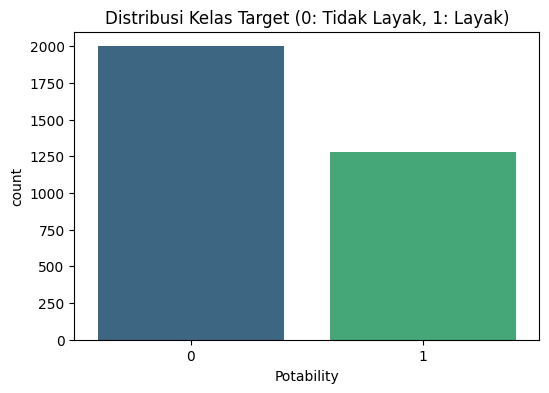

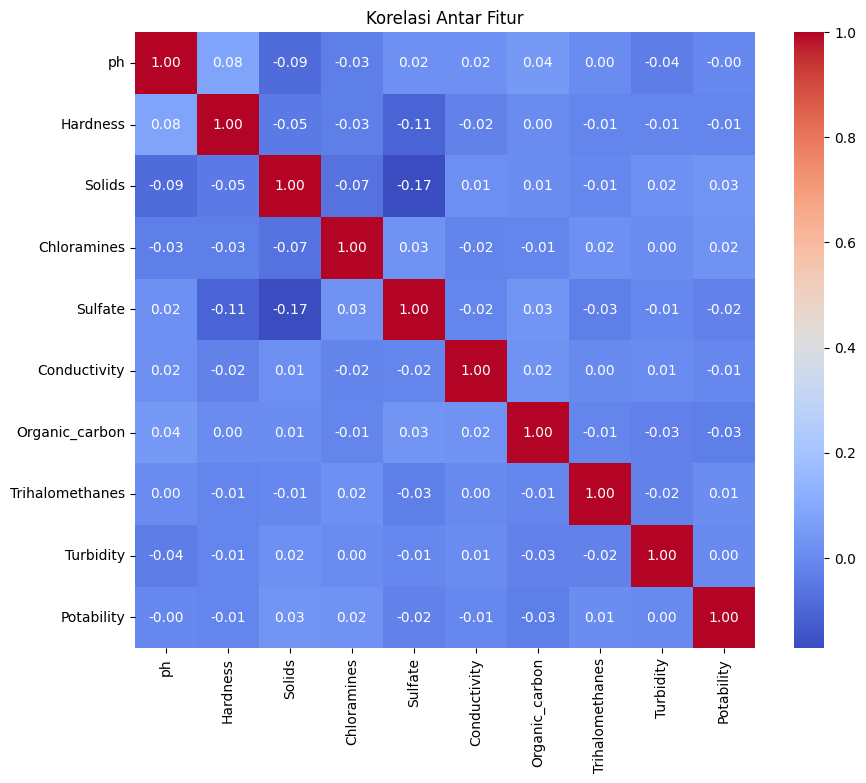

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (0: Tidak Layak, 1: Layak)')
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [17]:
imputer = SimpleImputer(strategy='mean')
df_clean_values = imputer.fit_transform(df)
df_clean = pd.DataFrame(df_clean_values, columns=df.columns)

print("Jumlah missing value setelah imputasi:", df_clean.isnull().sum().sum())


X = df_clean.drop('Potability', axis=1)
y = df_clean['Potability']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


df_final = pd.concat([X_scaled_df, y], axis=1)

print("\nPreprocessing Selesai. Cuplikan data bersih:")
print(df_final.head())


import os
os.makedirs('dataset_preprocessing', exist_ok=True) 
df_final.to_csv('dataset_preprocessing/water_potability_clean.csv', index=False)
print("\nFile data bersih tersimpan di: dataset_preprocessing/water_potability_clean.csv") 

Jumlah missing value setelah imputasi: 0

Preprocessing Selesai. Cuplikan data bersih:
             ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
0 -6.043133e-16  0.259195 -0.139471     0.112415  9.613574e-01      1.708954   
1 -2.289339e+00 -2.036414 -0.385987    -0.307694  3.145987e-15      2.062575   
2  6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15     -0.094032   
3  8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01     -0.778830   
4  1.368569e+00 -0.464429 -0.460249    -0.363698 -6.541765e-01     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       -1.180651         1.306149  -1.286298         0.0  
1        0.270597        -0.638480   0.684218         0.0  
2        0.781117         0.001509  -1.167365         0.0  
3        1.255134         2.152874   0.848412         0.0  
4       -0.824357        -2.181599   0.138786         0.0  

File data bersih tersimpan di: dataset_preprocessing/water_potability_c